In [6]:
X_train.size

1850

In [2]:
img_height=img_width = 224

### Getting the dataset from the directory

In [3]:
import csv
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

data_dir_new = r"C:\Users\KIIT\Desktop\PCOS detection\data\train_3"  

target_size = (224, 224)  
batch_size = 32  

train_df_new = image_dataset_from_directory(data_dir_new,labels="inferred",
                                        label_mode="binary",shuffle=True,seed=12,validation_split= 0.2,
                                        subset="training",image_size=(img_height, img_width),
                                        batch_size=batch_size)

Found 1924 files belonging to 2 classes.
Using 1540 files for training.


### Visualization of data

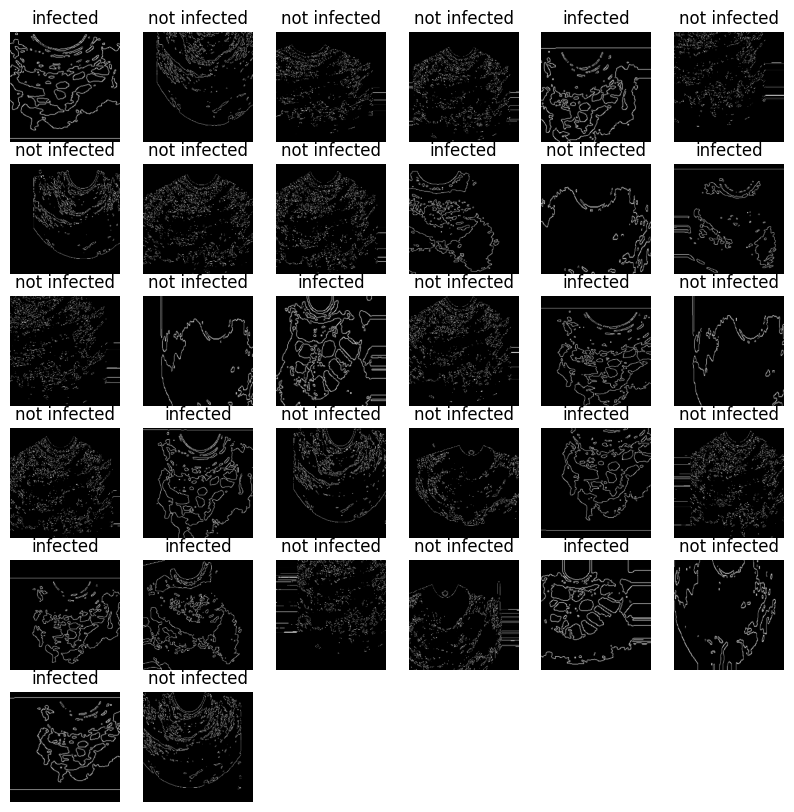

In [4]:
class_names = train_df_new.class_names
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_df_new.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [5]:
data_iterator = train_df_new.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

In [7]:
batch[0].shape

(32, 224, 224, 3)

In [8]:
batch[1].astype(int)

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define parameters
img_height = 224
img_width = 224
batch_size = 32

model = Sequential()
model.add(Conv2D(12, (5,5), padding='SAME', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(8, (5,5), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(4, (5,5), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_df_new, epochs=20)

model.evaluate(train_df_new)

model.save('pcos_classifier.keras')


Epoch 1/20


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.5556 - loss: 4.7457
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.7118 - loss: 0.5612
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.8588 - loss: 0.3558
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9336 - loss: 0.1822
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9726 - loss: 0.0867
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9893 - loss: 0.0425
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9992 - loss: 0.0189
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 1.0000 - loss: 0.0099
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 1.0000 - loss: 0.0051
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 1.0000 - loss: 0.0031
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 1.0000 - loss: 0.0023
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy

### Importing the testing data

In [22]:
import csv
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

img_height = img_width =224
# Define paths and parameters
data_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\test_follicles"  


target_size = (224, 224)  
batch_size = 32  

test_follicle = image_dataset_from_directory(data_dir,labels="inferred",
                                        label_mode="binary",shuffle=True,seed=12,validation_split= 0.15,
                                        subset="training",image_size=(img_height, img_width),
                                        batch_size=batch_size)

Found 30047 files belonging to 2 classes.
Using 25540 files for training.


In [23]:
class_names = test_follicle.class_names
class_names

['infected', 'notinfected']

In [24]:
true_labels = []
for images, labels in test_follicle:
    true_labels.extend(labels.numpy())
true_labels = np.concatenate(true_labels)

true_labels = true_labels.astype(int)


In [26]:
true_labels

array([1, 1, 1, ..., 1, 1, 1])

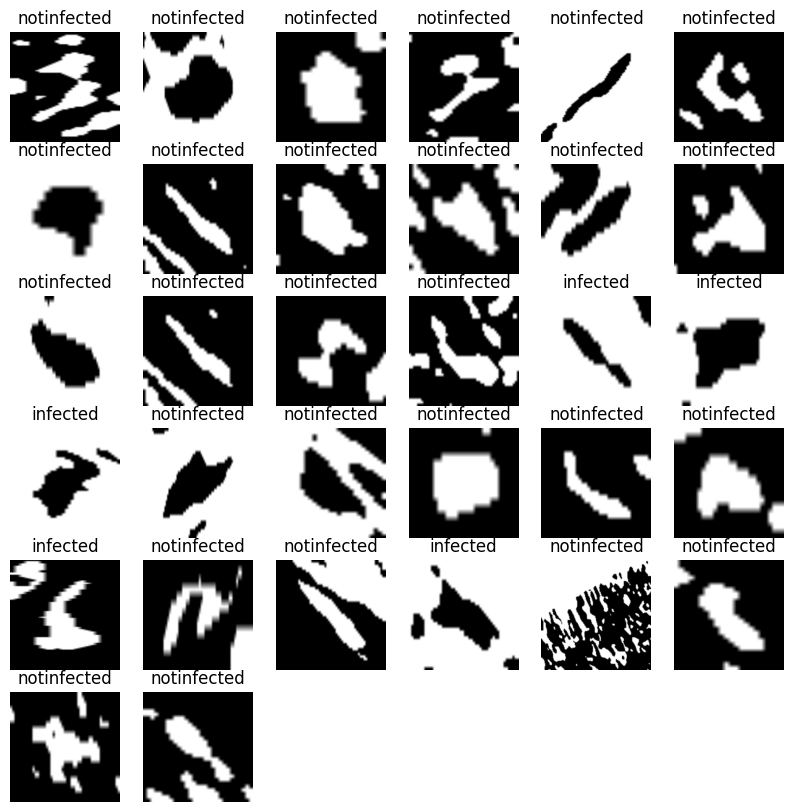

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in test_follicle.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

### Checking the training accuracy

In [28]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

model = load_model('pcos_classifier.keras')

loss, accuracy = model.evaluate(train_follicle)

print(f'Train accuracy: {accuracy}')

797/797 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.9942 - loss: 0.0172
Train accuracy: 0.9949760437011719


### Checking the testing accuracy

In [29]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

model = load_model('pcos_classifier.keras')

loss, accuracy = model.evaluate(test_follicle)
print(f'Test accuracy: {accuracy}')

predictions = model.predict(test_follicle)
predicted_labels = np.argmax(predictions, axis=1)


799/799 ━━━━━━━━━━━━━━━━━━━━ 51s 63ms/step - accuracy: 0.9891 - loss: 0.0621
Test accuracy: 0.9903680682182312
799/799 ━━━━━━━━━━━━━━━━━━━━ 57s 71ms/step


In [8]:
predicted_labels

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [9]:
original_labels = test_follicle.class_names

print("Original class labels:", original_labels)


Original class labels: ['infected', 'notinfected']


In [12]:
import numpy as np
from sklearn.metrics import classification_report

report = classification_report(true_labels,predicted_labels)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.10      0.10      2257
           1       0.91      0.91      0.91     23167

    accuracy                           0.84     25424
   macro avg       0.51      0.51      0.51     25424
weighted avg       0.84      0.84      0.84     25424



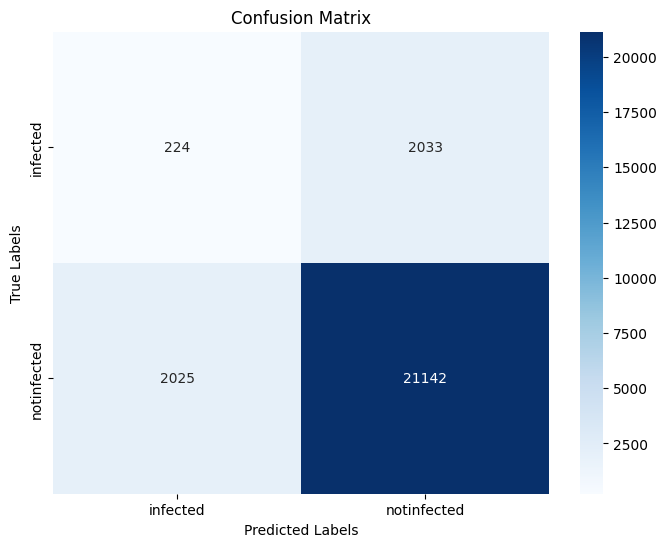

In [36]:
conf_matrix = confusion_matrix(y_true, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=original_labels, yticklabels=original_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()